# Machine learning

## PLA(Perceptron learning algorithm)

概要：对于给定的n维（两种类型）数据（训练集），找出一个n-1维的面，能够“尽可能”地按照数据类型分开。通过这个面，我们可以通过这个面对测试数据进行预

问题1：问什么w要设定为(1,1,1)含义是什么，相当于thresholder=-1
问题2：为什么通过list函数设定的traindatalist在函数外面就没有值了？

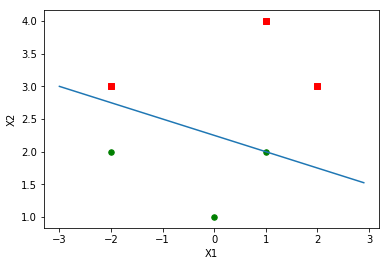

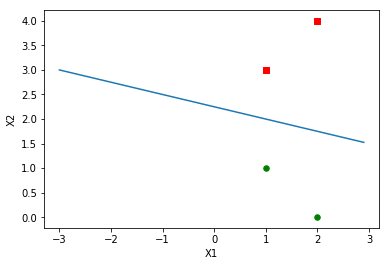

In [2]:
import numpy as np
import matplotlib.pyplot as plt

traindatalist=[]
labledatalist=[]
testdatalist=[]
testlablelist=[]

def createTrainData():
    f = open("./test_PLA/traindata.txt")
    for line in f.readlines():
        traindata = line.strip().split()
        traindata = list(map(lambda data:int(data), traindata))
        traindatalist.append(traindata)
        
def createLableData():
    f = open("./test_PLA/labledata.txt")
    for line in f.readlines():
        labledata = line.strip().split()
        labledata = list(map(lambda data:int(data), labledata))
        labledatalist.append(labledata)
        
def createTestData():
    f = open("./test_PLA/testdata.txt")
    for line in f.readlines():
        testdata = line.strip().split()
        testdata = list(map(lambda data:int(data), testdata))
        testdatalist.append(testdata)
        
def sigmoid(result):
    if result > 0:
        return 1
    else: 
        return -1

def trainbypla(traindataset, labledataset):
    #执行PLA算法
    traindata = np.mat(traindataset)
    labledata = np.mat(labledataset).transpose()
    m,n = np.shape(traindata)
    #初始化w
    w = np.ones((n,1)) 
    while(True):
        iscompleted = True
        for i in range(m):
            if sigmoid(np.dot(traindata[i], w)) == labledata[i]:
                continue
            else:
                w += (labledata[i]*traindata[i]).transpose()
                iscompleted = False
                break
        if iscompleted:
            break
    return w

def testbypla(w, testdataset):
    testlable = []
    testdata = np.mat(testdataset)
    m,n = np.shape(testdata)
    for i in range(m):
        testlable.append(sigmoid(np.dot(testdata[i], w)))
    testlablelist.append(testlable)
    return testlablelist

def plotBestFit(w, traindataset, labledataset):
    dataArr = np.array(traindataset)
    n = np.shape(dataArr)[0]
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]

    for i in range(n):
        if labledataset[0][i] == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig=plt.figure()
    ax= fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2, ycord2,s=30,c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-w[0]-w[1] * x)/w[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()


createTrainData()
createLableData()
createTestData()

w = trainbypla(traindatalist, labledatalist)
testbypla(w, testdatalist)
plotBestFit(w, traindatalist, labledatalist)
plotBestFit(w, testdatalist, testlablelist)
